In [4]:
from b2heavy.TwoPointFunctions.utils     import correlation_diagnostics
from b2heavy.TwoPointFunctions.types2pts import CorrelatorIO, plot_effective_coeffs
from b2heavy.TwoPointFunctions.fitter    import StagFitter

import numpy             as np
import gvar              as gv
import matplotlib.pyplot as plt

In [5]:
from b2heavy.ThreePointFunctions.corr3pts import BINSIZE as BSIZE

In the following section, we set all the parameter for the analysis

In [6]:
# Correlator specifics
ENSEMBLE = 'Coarse-1'
MESON    = 'Dst'
MOMENTUM = '300'

DATA_DIR = '/Users/pietro/code/data_analysis/BtoD/Alex/'

BINSIZE  = BSIZE[ENSEMBLE]
SMSLIST  = ['1S-1S','d-d','d-1S']

# Correlation matrix specifics
DIAG   = False
BLOCK  = False
SCALE  = True
SHRINK = True
SVD    = 1e-12

# Specifics of the analysis
TRANGE_EFF = (10,18) 
TRANGE     = (4,18)
NSTATES    = 3
WPRIORS    = True
JKFIT      = False

In the following cell, we initialize the objects of `b2heavy` that read the data and format them

In [7]:
io   = CorrelatorIO(ENSEMBLE,MESON,MOMENTUM,PathToDataDir=DATA_DIR)
stag = StagFitter(
    io       = io,
    jkBin    = BINSIZE,
    smearing = SMSLIST
)

We also initialize the instruction to build the covariance matrix

In [8]:
cov_specs = dict(
    diag   = DIAG  ,
    block  = BLOCK ,
    scale  = SCALE ,
    shrink = SHRINK,
    cutsvd = SVD   
)

In the following, we calculate and plot effective mass

In [9]:
effm,effa = stag.meff(TRANGE_EFF,verbose=True,**cov_specs)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/pietro/code/software/B2heavy/b2heavy/TwoPointFunctions/types2pts.py:38: RuntimeWarning: invalid value encountered in sqrt
  m = np.arccosh( (y[(it+1)%len(y)]+y[(it-1)%len(y)])/y[it]/2 )
/Users/pietro/code/software/B2heavy/b2heavy/TwoPointFunctions/types2pts.py:38: RuntimeWarning: invalid value encountered in log
  m = np.arccosh( (y[(it+1)%len(y)]+y[(it-1)%len(y)])/y[it]/2 )
/Users/pietro/code/software/B2heavy/b2heavy/TwoPointFunctions/types2pts.py:38: RuntimeWarning: invalid value encountered in arccosh
  m = np.arccosh( (y[(it+1)%len(y)]+y[(it-1)%len(y)])/y[it]/2 )


Least Square Fit:
  chi2/dof [dof] = 0.69 [54]    Q = 0.96    logGBF = 93.19

Parameters:
          const   1.2043 (73)     [ 1.211 (66) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10*,1e-10)    (itns/time = 2/0.3)
  fitter = scipy_least_squares    method = trf

Least Square Fit:
  chi2/dof [dof] = 0.62 [54]    Q = 0.99    logGBF = 196.76

Parameters:
('1S-1S', 'Bot')     0.826 (30)      [    0.80 (12) ]  
('1S-1S', 'Par')     1.138 (35)      [    1.15 (16) ]  
 ('d-1S', 'Bot')    0.1191 (25)      [  0.1159 (78) ]  
 ('d-1S', 'Par')    0.1609 (28)      [   0.160 (11) ]  
  ('d-d', 'Bot')   0.01810 (30)      [  0.0175 (10) ]  
  ('d-d', 'Par')   0.02353 (34)      [ 0.02322 (73) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10*,1e-10)    (itns/time = 2/0.0)
  fitter = scipy_least_squares    method = trf



/Users/pietro/code/software/B2heavy/b2heavy/TwoPointFunctions/types2pts.py:38: RuntimeWarning: invalid value encountered in sqrt
  m = np.arccosh( (y[(it+1)%len(y)]+y[(it-1)%len(y)])/y[it]/2 )
/Users/pietro/code/software/B2heavy/b2heavy/TwoPointFunctions/types2pts.py:38: RuntimeWarning: invalid value encountered in log
  m = np.arccosh( (y[(it+1)%len(y)]+y[(it-1)%len(y)])/y[it]/2 )
/Users/pietro/code/software/B2heavy/b2heavy/TwoPointFunctions/types2pts.py:38: RuntimeWarning: invalid value encountered in arccosh
  m = np.arccosh( (y[(it+1)%len(y)]+y[(it-1)%len(y)])/y[it]/2 )


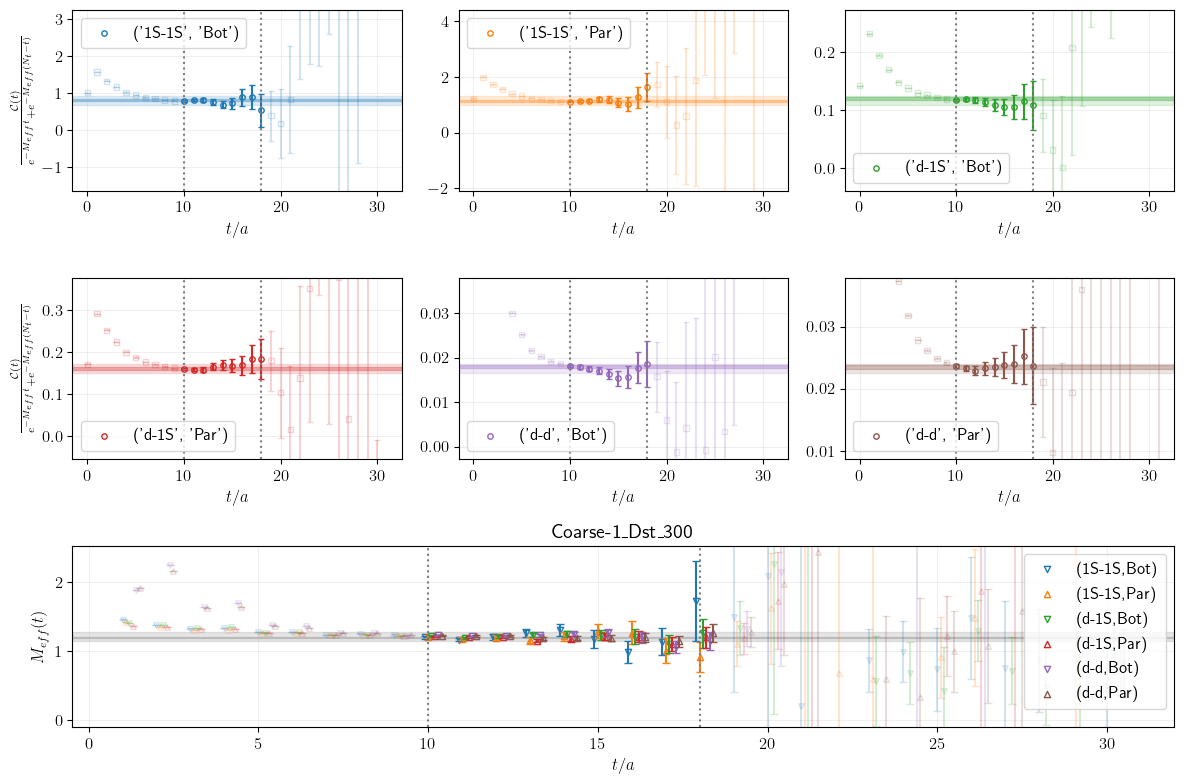

In [10]:
toplot = stag.meff(TRANGE_EFF,**cov_specs,plottable=True)

plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 12

plt.figure(figsize=(12, 6 if len(stag.keys)/len(SMSLIST)==1 else 8))
plot_effective_coeffs(TRANGE_EFF,Aknob=20,*toplot)

plt.title(f'{ENSEMBLE}_{MESON}_{MOMENTUM}')

plt.tight_layout()

plt.show()


Here we set priors

In [11]:
effa

BufferDict({('1S-1S', 'Bot'): 0.826(30), ('1S-1S', 'Par'): 1.138(35), ('d-1S', 'Bot'): 0.1191(25), ('d-1S', 'Par'): 0.1609(28), ('d-d', 'Bot'): 0.01810(30), ('d-d', 'Par'): 0.02353(34)})

In [12]:
priors = stag.priors(NSTATES,Meff=effm,Aeff=effa)
priors 

{'E': [1.204(48), -1.81(58), -1.09(80), -2.4(2.5), -2.4(2.5), -2.4(2.5)],
 'Z_1S_Bot': [-0.10(1.00), -1.2(1.2), 0.5(1.5), 0.5(1.5), 0.5(3.0), 0.5(3.0)],
 'Z_1S_Par': [0.06(1.00), -1.2(1.2), 0.5(1.5), 0.5(1.5), 0.5(3.0), 0.5(3.0)],
 'Z_d-1S_Bot': [0.5(1.7), 0.5(1.7), 0.5(1.7), 0.5(1.7)],
 'Z_d-1S_Par': [0.5(1.7), 0.5(1.7), 0.5(1.7), 0.5(1.7)],
 'Z_d_Bot': [-2.0(1.0), -3.0(1.5), 0.5(1.5), 0.5(1.5), 0.5(3.0), 0.5(3.0)],
 'Z_d_Par': [-1.9(1.0), -5.5(2.0), 0.5(1.5), 0.5(1.5), 0.5(3.0), 0.5(3.0)]}

Now we perform the fit

In [13]:
fit = stag.fit(
    Nstates = NSTATES,
    trange  = TRANGE,
    priors  = priors,
    verbose = False,
    **cov_specs
)

In [14]:
fitres = stag.fit_result(
    NSTATES,
    TRANGE,
    verbose = True,
    priors  = priors if WPRIORS else None
)

# ---------- 3+3 fit in (4, 18) for mes: Dst of ens: Coarse-1 for mom: 300 --------------
Least Square Fit:
  chi2/dof [dof] = 0.55 [90]    Q = 1    logGBF = 1438.6

Parameters:
            E 0   1.183 (17)     [   1.204 (48) ]  
              1   -2.92 (46)     [   -1.81 (58) ]  *
              2   -1.68 (34)     [   -1.09 (80) ]  
              3   -1.46 (16)     [   -2.4 (2.5) ]  
              4   -0.33 (10)     [   -2.4 (2.5) ]  
              5   -0.17 (20)     [   -2.4 (2.5) ]  
     Z_1S_Bot 0   -0.34 (16)     [ -0.10 (1.00) ]  
              1   -0.45 (16)     [   -1.2 (1.2) ]  
              2    0.93 (12)     [    0.5 (1.5) ]  
              3    1.05 (16)     [    0.5 (1.5) ]  
              4    2.27 (42)     [    0.5 (3.0) ]  
              5    2.6 (1.0)     [    0.5 (3.0) ]  
     Z_1S_Par 0   -0.18 (16)     [  0.06 (1.00) ]  
              1   -0.77 (16)     [   -1.2 (1.2) ]  
              2    1.13 (12)     [    0.5 (1.5) ]  
              3    0.81 (15)     [    0.5

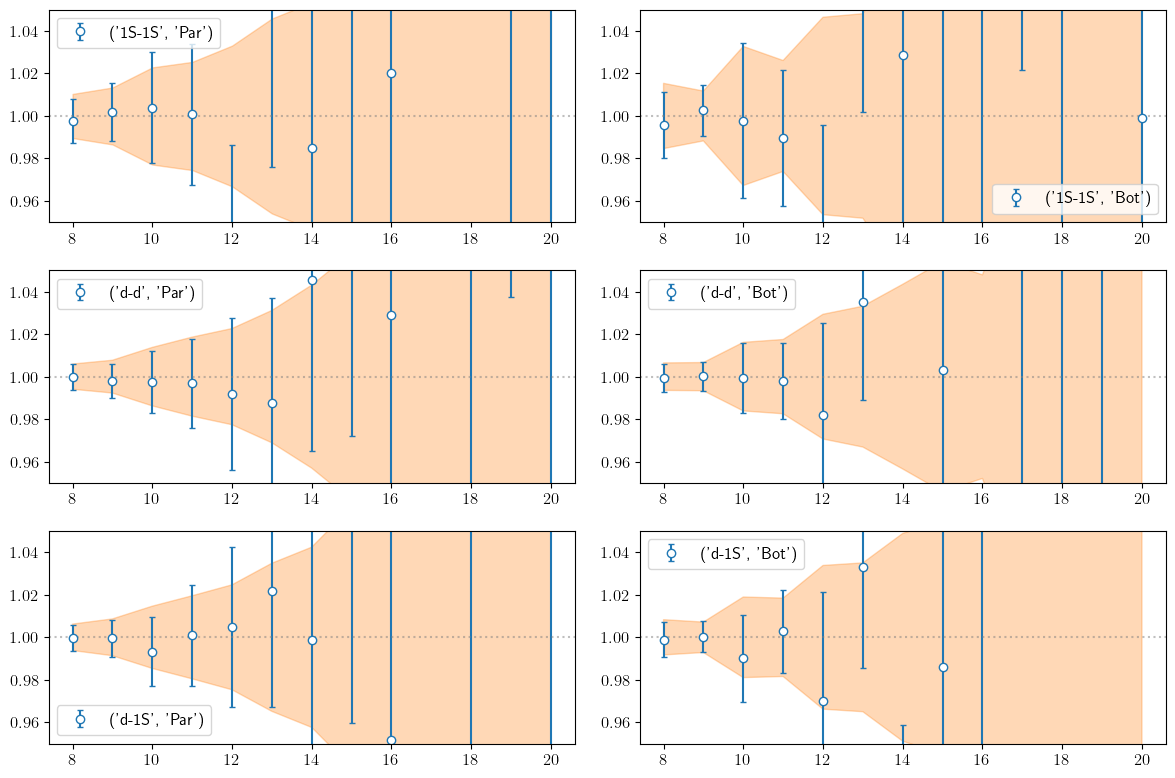

In [93]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 12

npol = len(stag.keys)//len(SMSLIST)
f, ax = plt.subplots(3,npol,figsize=(12,8))
stag.plot_fit(ax,NSTATES,TRANGE)

plt.tight_layout()